## Density Models Assignment

In [2]:
# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

#import numpy
import numpy as np

# from sklearn import make_blobs
from sklearn.datasets import make_blobs

# import DBSCAN
from sklearn.cluster import DBSCAN

## Task: Generate clusters with make_blobs function 

Use the following settings:
   * n_samples=150,
   * n_features=2,
   * centers=3,
   * cluster_std=0.6,
   * random_state=0

In [3]:
X, y = make_blobs(n_samples = 150,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.6,
                  random_state = 0)




* plot data points

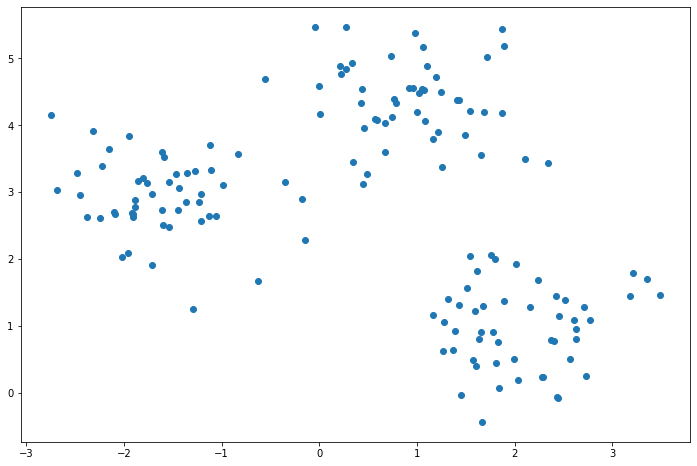

In [7]:
plt.scatter(X[:,0], X[:,1])



* define function plot_clusters

In [76]:
def plot_clusters(X, y_res, ax, plt_cluster_centers = False):
    X_centroid = []
    Y_centroid = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster, 1]
        X_centroid.append(np.mean(x))
        Y_centroid.append(np.mean(y))
        
        ax.scatter(x,
                    y,
                    label=f'cluster {cluster}',
                  marker ='s')
    
    if plt_cluster_centers:
        ax.scatter(X_centroid,
                    Y_centroid,
                    marker='*',
                    s = 250,
                    color = 'red')
    ax.legend(fontsize='x-small')
    




## Objective: 
Try to find optimal settings of `eps` and `min_samples` params of DBSCAN. You can iterate over multiple parameters combinations and plot the clustering results.

* define params space

In [79]:
eps_range = np.linspace(0.4,0.9,6)
print(eps_range)

min_samples_range = np.linspace(5,9,5)
print(min_samples_range)



[0.4 0.5 0.6 0.7 0.8 0.9]
[5. 6. 7. 8. 9.]


* combinations (hint: use 'product' function from 'itertools')

In [82]:
from itertools import product

combinations = product(eps_range, min_samples_range)

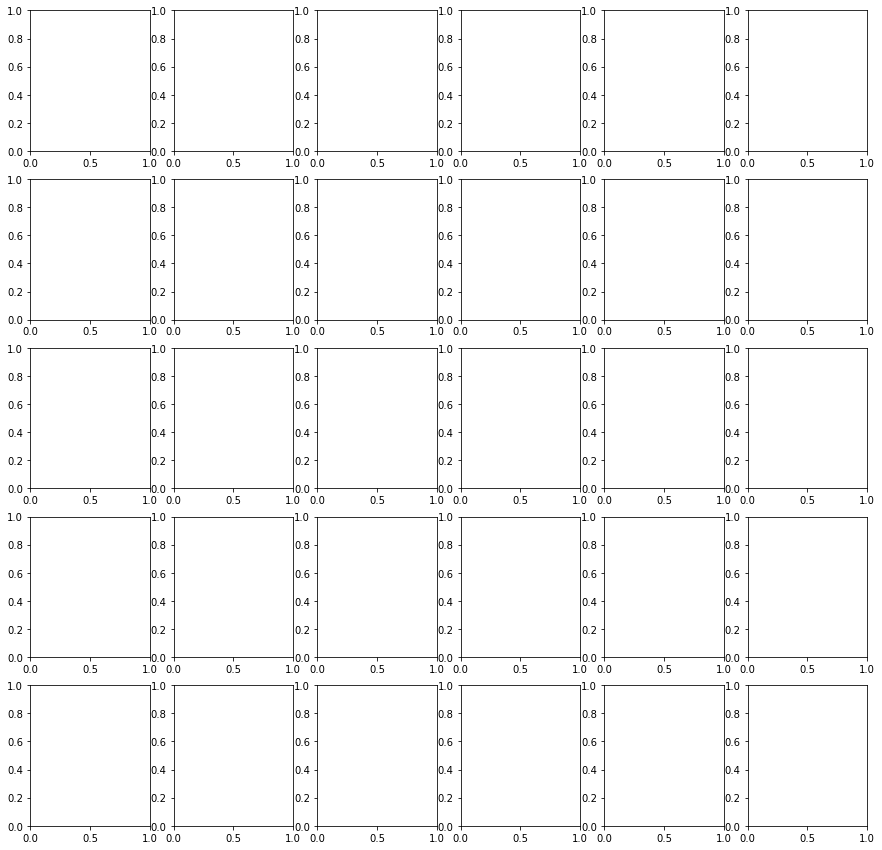

In [84]:


fig, axes = plt.subplots(figsize=(15, 15), nrows=len(min_samples_range), ncols=len(eps_range) )

ax = axes.flatten()
index = 0

for eps, min_samples in combinations:
    db = DBSCAN(eps= eps,
                min_samples = min_samples,
                metric = 'euclidean')
    y_db = db.fit_predict(X)
                     
    plot_clusters(X,y_db, ax[index])
    ax[index].set_title(f'eps: {eps:.2f}, min_samples: {min_samples}')
    index +=1
    
plt.show()